In [4]:
#all necessary imports
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib as plt
df = pd.read_csv("NFL_Team_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  672 non-null    int64  
 1   team                  672 non-null    object 
 2   wins                  672 non-null    int64  
 3   losses                672 non-null    int64  
 4   win_loss_perc         672 non-null    float64
 5   points                672 non-null    int64  
 6   points_opp            672 non-null    int64  
 7   points_diff           672 non-null    int64  
 8   mov                   352 non-null    float64
 9   g                     672 non-null    int64  
 10  total_yards           672 non-null    int64  
 11  plays_offense         672 non-null    int64  
 12  yds_per_play_offense  672 non-null    float64
 13  turnovers             672 non-null    int64  
 14  fumbles_lost          672 non-null    int64  
 15  first_down            6

In [5]:
# Load the dataset
df2 = pd.read_csv("NFL_Team_Data.csv")

# Define the conference mapping for all 32 teams
conference_mapping = {
    "New England Patriots": "AFC",
    "Miami Dolphins": "AFC",
    "Buffalo Bills": "AFC",
    "New York Jets": "AFC",
    "Baltimore Ravens": "AFC",
    "Cincinnati Bengals": "AFC",
    "Pittsburgh Steelers": "AFC",
    "Cleveland Browns": "AFC",
    "Indianapolis Colts": "AFC",
    "Tennessee Titans": "AFC",
    "Jacksonville Jaguars": "AFC",
    "Houston Texans": "AFC",
    "Kansas City Chiefs": "AFC",
    "Denver Broncos": "AFC",
    "Oakland Raiders": "AFC",
    "San Diego Chargers": "AFC",
    "Philadelphia Eagles": "NFC",
    "Dallas Cowboys": "NFC",
    "Washington Redskins": "NFC",
    "New York Giants": "NFC",
    "Green Bay Packers": "NFC",
    "Minnesota Vikings": "NFC",
    "Detroit Lions": "NFC",
    "Chicago Bears": "NFC",
    "Carolina Panthers": "NFC",
    "New Orleans Saints": "NFC",
    "Tampa Bay Buccaneers": "NFC",
    "Atlanta Falcons": "NFC",
    "St. Louis Rams": "NFC",
    "Seattle Seahawks": "NFC",
    "San Francisco 49ers": "NFC",
    "Arizona Cardinals": "NFC"
}

# Add the 'conference' column based on the team names
if 'team' in df2.columns:
    df2["conference"] = df2["team"].map(conference_mapping)
else:
    print("The 'team' column does not exist in the DataFrame.")

# Save the updated DataFrame if needed
df2.to_csv("Updated_Data.csv", index=False)

print(df2.head())

   year                  team  wins  losses  win_loss_perc  points  \
0  2003  New England Patriots    14       2          0.875     348   
1  2003        Miami Dolphins    10       6          0.625     311   
2  2003         Buffalo Bills     6      10          0.375     243   
3  2003         New York Jets     6      10          0.375     283   
4  2003      Baltimore Ravens    10       6          0.625     391   

   points_opp  points_diff  mov   g  ...  rush_yds_per_att  rush_fd  \
0         238          110  6.9  16  ...               3.4       91   
1         261           50  3.1  16  ...               3.7       99   
2         279          -36 -2.3  16  ...               3.9       96   
3         299          -16 -1.0  16  ...               4.0       78   
4         281          110  6.9  16  ...               4.8      115   

   penalties  penalties_yds  pen_fd  score_pct  turnover_pct  exp_pts_tot  \
0        111            998      26       27.9          11.3      -136.51  

In [6]:
# additional data
df2 = pd.read_csv("Additional Data.csv")
df2

,year,SB,winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,2024,LVIII (58),Kansas City Chiefs,25,San Francisco 49ers,22,Patrick Mahomes,Alleigent Stadium,Las Vegas,Nevada
1,2023,LVII (57),Kansas City Chiefs,38,Philadelphia Eagles,35,Patrick Mahomes,State Farm Stadium,Glendale,Arizona
2,2021,LVI (56),Los Angeles Rams,23,Cincinnati Bengals,20,Cooper Kupp,SoFi Stadium,Inglewood,California
3,2021,LV (55),Tampa Bay Buccaneers,31,Kansas City Chiefs,9,Tom Brady,Raymond James Stadium,Tampa,Florida
4,2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
5,2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
6,2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
7,2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
8,2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California
9,2015,XLIX (49),New England Patriots,28,Seattle Seahawks,24,Tom Brady,University of Phoenix Stadium,Glendale,Arizona


In [7]:
#renaming teams that have changed
df.team.replace({"St. Louis Rams": "Los Angeles Rams",
          "Washington Redskins": "Washington Commanders",
          "Oakland Raiders": "Las Vegas Raiders"},
          inplace = True)

/var/folders/bw/pk8spyhx2174wgg_7cvcqs4m0000gn/T/ipykernel_51600/2517370638.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.team.replace({"St. Louis Rams": "Los Angeles Rams",


In [8]:
# joining datasets together
final_data = pd.merge(df,df2,how = "outer", on=["year"])
final_data= final_data.drop(columns=[
    'mov','g', 'MVP','Stadium','City','State','first_down', 'turnovers','pass_net_yds_per_att', 'SB',
    'fumbles_lost','exp_pts_tot', 'points_diff', 'plays_offense','pass_int','pass_att', 'win_loss_perc', 'penalties', 'penalties_yds',
    'pass_cmp','yds_per_play_offense','pass_fd', 'rush_att','rush_yds_per_att','rush_fd','score_pct','turnover_pct','pen_fd',
    'ties'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         705 non-null    int64  
 1   team         704 non-null    object 
 2   wins         704 non-null    float64
 3   losses       704 non-null    float64
 4   points       704 non-null    float64
 5   points_opp   704 non-null    float64
 6   total_yards  704 non-null    float64
 7   pass_yds     704 non-null    float64
 8   pass_td      704 non-null    float64
 9   rush_yds     704 non-null    float64
 10  rush_td      704 non-null    float64
 11  winner       673 non-null    object 
 12  Winner Pts   673 non-null    float64
 13  Loser        673 non-null    object 
 14  Loser Pts    673 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 82.7+ KB


In [9]:

X, y = make_classification(
    n_features = 14,
    n_classes=14,
    n_redundant= 2,
    n_samples= 705,
    n_informative=12,
    n_clusters_per_class=1,
    random_state=1,
    class_sep = 1.5
)

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=306, shuffle=True)

In [10]:

predictor = GaussianNB()

predictor.fit(X_train, y_train)

prediction = predictor.predict(X_test)

results_dict = {'Accuracy':0,'Precision':0,'Recall':0}

accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction, average='macro')
recall = recall_score(y_test, prediction, average = 'macro')

results_dict.update({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})
result = pd.DataFrame([results_dict])
result

,Accuracy,Precision,Recall
0,0.702128,0.710667,0.712285


/opt/anaconda3/envs/CIS377/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/opt/anaconda3/envs/CIS377/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


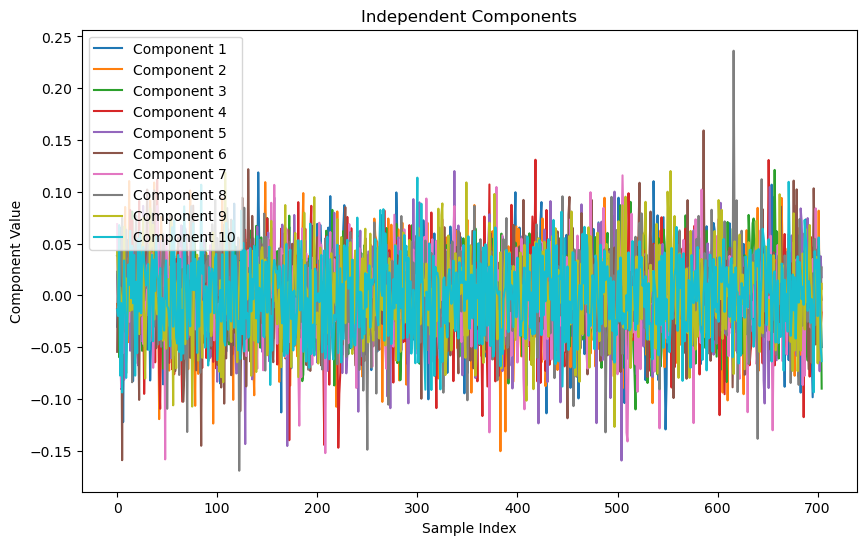

Results using ICA:
   Accuracy  Precision    Recall
0  0.737589   0.739163  0.749054


In [11]:
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import numpy as np

# Apply ICA
ica = FastICA(n_components=10, random_state=42)  # Adjust n_components as needed
X_ica = ica.fit_transform(X)  # Transform the data to independent components

# Visualize the ICA components (optional)
plt.figure(figsize=(10, 6))
for i in range(10):  # Visualize first 10 components
    plt.plot(X_ica[:, i], label=f'Component {i+1}')
plt.title('Independent Components')
plt.xlabel('Sample Index')
plt.ylabel('Component Value')
plt.legend()
plt.show()

# Continue with classification using ICA-transformed data
X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(
    X_ica, y, test_size=0.2, random_state=306, shuffle=True
)

predictor.fit(X_train_ica, y_train_ica)
prediction_ica = predictor.predict(X_test_ica)

# Evaluate performance with ICA-transformed data
results_ica_dict = {'Accuracy': 0, 'Precision': 0, 'Recall': 0}
accuracy_ica = accuracy_score(y_test_ica, prediction_ica)
precision_ica = precision_score(y_test_ica, prediction_ica, average='macro')
recall_ica = recall_score(y_test_ica, prediction_ica, average='macro')

results_ica_dict.update({'Accuracy': accuracy_ica, 'Precision': precision_ica, 'Recall': recall_ica})
result_ica = pd.DataFrame([results_ica_dict])

print("Results using ICA:")
print(result_ica)


In [12]:
# Example data for AFC and NFC teams
afc_teams_list = [
    "New England Patriots", "Miami Dolphins", "Buffalo Bills", "New York Jets",
    "Baltimore Ravens", "Cincinnati Bengals", "Pittsburgh Steelers", "Cleveland Browns",
    "Indianapolis Colts", "Tennessee Titans", "Jacksonville Jaguars", "Houston Texans",
    "Kansas City Chiefs", "Denver Broncos", "Las Vegas Raiders", "Los Angeles Chargers"
]

nfc_teams_list = [
    "Philadelphia Eagles", "Dallas Cowboys", "New York Giants", "Washington Commanders",
    "Green Bay Packers", "Minnesota Vikings", "Detroit Lions", "Chicago Bears",
    "Carolina Panthers", "New Orleans Saints", "Tampa Bay Buccaneers", "Atlanta Falcons",
    "Los Angeles Rams", "Seattle Seahawks", "San Francisco 49ers", "Arizona Cardinals"
]

# Define a function to group teams into divisions
def group_into_divisions(conference_name, teams):
    division_names = [
        f"{conference_name} East",
        f"{conference_name} North",
        f"{conference_name} South",
        f"{conference_name} West",
    ]
    
    # Assign teams into divisions
    divisions = {name: teams[i:i+4] for i, name in zip(range(0, len(teams), 4), division_names)}
    return divisions

# Group AFC and NFC teams into divisions
afc_divisions = group_into_divisions("AFC", afc_teams_list)
nfc_divisions = group_into_divisions("NFC", nfc_teams_list)

# Function to format division display
def format_divisions(conference_name, divisions):
    display = f"🏈 {conference_name} 🏈\n"
    for division, teams in divisions.items():
        display += f"\n🔹 {division} 🔹\n"
        display += "\n".join([f"  - {team}" for team in teams])
        display += "\n"
    return display

# Generate and display the formatted output for both conferences
afc_display = format_divisions("AFC", afc_divisions)
nfc_display = format_divisions("NFC", nfc_divisions)

# Ensure full output is displayed
print(afc_display)
print("\n" + nfc_display)


🏈 AFC 🏈

🔹 AFC East 🔹
  - New England Patriots
  - Miami Dolphins
  - Buffalo Bills
  - New York Jets

🔹 AFC North 🔹
  - Baltimore Ravens
  - Cincinnati Bengals
  - Pittsburgh Steelers
  - Cleveland Browns

🔹 AFC South 🔹
  - Indianapolis Colts
  - Tennessee Titans
  - Jacksonville Jaguars
  - Houston Texans

🔹 AFC West 🔹
  - Kansas City Chiefs
  - Denver Broncos
  - Las Vegas Raiders
  - Los Angeles Chargers


🏈 NFC 🏈

🔹 NFC East 🔹
  - Philadelphia Eagles
  - Dallas Cowboys
  - New York Giants
  - Washington Commanders

🔹 NFC North 🔹
  - Green Bay Packers
  - Minnesota Vikings
  - Detroit Lions
  - Chicago Bears

🔹 NFC South 🔹
  - Carolina Panthers
  - New Orleans Saints
  - Tampa Bay Buccaneers
  - Atlanta Falcons

🔹 NFC West 🔹
  - Los Angeles Rams
  - Seattle Seahawks
  - San Francisco 49ers
  - Arizona Cardinals



In [13]:
recent_data = [
    [2025, 'Arizona Cardinals', 6, 5, 244, 236, 3886, 2219, 12, 1543, 12, None, 0, None, 0],
    [2025, 'Atlanta Falcons', 6, 5, 244, 274, 4142, 2680, 17, 1297, 8, None, 0, None, 0],
    [2025, 'Baltimore Ravens', 8, 4, 364, 294, 5216, None, 2162, 17, None, 0, None, 0],
    [2025, 'Buffalo Bills', 9, 2, 320, 214, 3859, 2487, 18, 1311, 18, None, 0, None, 0],
    [2025, 'Carolina Panthers', 3, 8, 194, 340, 3257, 1956, 12, 1185, 9, None, 0, None, 0],
    [2025, 'Chicago Bears', 4, 8, 241, 240, 3939, None, 1308, 12, None, 0, None, 0],
    [2025, 'Cincinnati Bengals', 4, 7, 297, 296, 4035, 2890, 27, 1007, 8, None, 0, None, 0],
    [2025, 'Cleveland Browns', 3, 8, 186, 267, 3466, 2247, 12, 970, 6, None, 0, None, 0],
    [2025, "Dallas Cowboys", 5, 7, 248, 339, 4041, 2842, 16, 1030, 4, None, 0, None, 0],
    [2025, "Denver Broncos", 7, 5, 264, 202, 3920, 2423, 17, 1339, 8, None, 0, None, 0],
    [2025, "Detroit Lions", 11, 1, 383, 203, 4924, 2889, 9, 1853, 21, None, 0, None, 0],
    [2025, 'Green Bay Packers', 9, 3, 318, 240, 4681, 2812, 23, 1782, 12, None, 0, None, 0],
    [2025, "Houston Texans", 7, 5, 285, 268, 4342, 2657, 9, 1375, 13, None, 0, None, 0],
    [2025, "Indianapolis Colts", 5, 7, 242, 274, 3993, 2396, 14, 1400, 11, None, 0, None, 0],
    [2025, "Jacksonville Jaguars", 2, 9, 208, 316, 3399, 2081, 11, 118, 10, None, 0, None, 0],
    [2025, "Kansas City Chiefs", 10, 1, 270, 218, 3952, 2491, 18, 1279, 11, None, 0, None, 0],
    [2025, "Las Vegas Raiders", 2, 9, 206, 314, 3461, 2398, 12, 821, 7, None, 0, None, 0],
    [2025, "Los Angeles Chargers", 7, 4, 243, 175, 3727, 2250, 13, 1299, 12, None, 0, None, 0],
    [2025, "Los Angeles Rams", 5, 6, 233, 276, 3846, 2604, 15, 1046, 9, None, 0, None, 0],
    [2025, "Miami Dolphins", 5, 7, 232, 266, 4175, 2614, 16, 1324, 8, None, 0, None, 0],
    [2025, "Minnesota Vikings", 9, 2, 274, 197, 4065, 2574, 21, 1288, 6, None, 0, None, 0],
    [2025, 'New England Patriots', 3, 9, 197, 282, 3638, 2007, 12, 1354, 7, None, 0, None, 0],
    [2025, "New Orleans Saints", 4, 7, 262, 260, 2383, 15, 1438, 14, None, 0, None, 0],
    [2025, "New York Giants", 2, 10, 183, 279, 3837, 2198, 8, 1391, 10, None, 0, None, 0],
    [2025, "Philadelphia Eagles", 9, 2, 296, 199, 4508, 2153, 13, 2127, 22, None, 0, None, 0],
    [2025, "Pittsburgh Steelers", 8, 3, 252, 186, 3824, 2121, 12, 1487, 10, None, 0, None, 0],
    [2025, "San Francisco 49ers", 5, 6, 260, 260, 4334, 2708, 14, 1522, 10, None, 0, None, 0],
    [2025, 'Seattle Seahawks', 6, 5, 246, 244, 4050, 2829, 12, 980, 13, None, 0, None, 0],
    [2025, 'Tampa Bay Buccaneers', 5, 6, 309, 273, 4208, 2656, 24, 1410, 12, None, 0, None, 0],
    [2025, 'Tennessee Titans', 3, 8, 202, 290, 3555, 2021, 14, 1302, 7, None, 0, None, 0],
    [2025, 'Washington Commanders', 7, 5, 334, 277, 4589, 2673, 14, 1773, 20, None, 0, None, 0]]

columns = ['year', 'team', 'wins', 'losses', 'points', 'points_opp', 'total_yards', 'pass_yds', 'pass_td', 'rush_yds', 'rush_td', 'winner', 'Winner Pts', 'Loser', 'Loser Pts']
df3 = pd.DataFrame(recent_data, columns=columns)

df4 = pd.concat([final_data, df3], ignore_index=False)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 0 to 30
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         736 non-null    int64  
 1   team         735 non-null    object 
 2   wins         735 non-null    float64
 3   losses       735 non-null    float64
 4   points       735 non-null    float64
 5   points_opp   735 non-null    float64
 6   total_yards  735 non-null    float64
 7   pass_yds     733 non-null    float64
 8   pass_td      735 non-null    float64
 9   rush_yds     735 non-null    float64
 10  rush_td      732 non-null    float64
 11  winner       676 non-null    object 
 12  Winner Pts   701 non-null    float64
 13  Loser        676 non-null    object 
 14  Loser Pts    701 non-null    float64
dtypes: float64(11), int64(1), object(3)
memory usage: 92.0+ KB


In [18]:
# Filter data for the years 2003 to 2024
df_filtered = df4[(df4['year'] >= 2003) & (df4['year'] <= 2024)]

# Calculate improvement in wins for each team
df_filtered['win_diff'] = df_filtered.groupby('team')['wins'].diff()

# Find the most improved team
most_improved_team = df_filtered.loc[df_filtered['win_diff'].idxmax()]
print("Most Improved Team (2003–2024):")
print(most_improved_team[['team', 'year', 'wins', 'win_diff']])

# Find the year with the worst record for the most improved team
worst_record = df_filtered[df_filtered['team'] == most_improved_team['team']].nsmallest(1, 'wins')

# Find the year with the best record for the most improved team
best_record = df_filtered[df_filtered['team'] == most_improved_team['team']].nlargest(1, 'wins')

# Output the results
print("\nWorst Record:")
print(worst_record[['team', 'year', 'wins']])

print("\nBest Record:")
print(best_record[['team', 'year', 'wins']])




Most Improved Team (2003–2024):
team        Miami Dolphins
year                  2008
wins                  11.0
win_diff              10.0
Name: 160, dtype: object

Worst Record:
               team  year  wins
131  Miami Dolphins  2007   1.0

Best Record:
               team  year  wins
160  Miami Dolphins  2008  11.0


/var/folders/bw/pk8spyhx2174wgg_7cvcqs4m0000gn/T/ipykernel_51600/114500493.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['win_diff'] = df_filtered.groupby('team')['wins'].diff()


In [14]:
X, y = make_classification(
    n_features = 14,
    n_classes=14,
    n_redundant= 2,
    n_samples= 736,
    n_informative=12,
    n_clusters_per_class=1,
    random_state=1,
    class_sep = 1.5
)

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.043, random_state=306, shuffle=True)
predictor = GaussianNB()

predictor.fit(X_train, y_train)

prediction2 = predictor.predict(X_test)

results_dict = {'Accuracy':0,'Precision':0,'Recall':0}

accuracy = accuracy_score(y_test, prediction2)
precision = precision_score(y_test, prediction2, average='macro')
recall = recall_score(y_test, prediction2, average = 'macro')

results_dict.update({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})
result = pd.DataFrame([results_dict])
result


/opt/anaconda3/envs/CIS377/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/CIS377/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Precision,Recall
0,0.65625,0.535897,0.482051


In [15]:
print(prediction2)
df4.tail(32)

[ 8  2  6  4  8  3  5  1  1  3 11  8  3  8  9 11 10  1  6 10  4 12  7  8
  7  1  2 10 11 12 10  3]


,year,team,wins,losses,points,points_opp,total_yards,pass_yds,pass_td,rush_yds,rush_td,winner,Winner Pts,Loser,Loser Pts
704,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kansas City Chiefs,25.0,San Francisco 49ers,22.0
0,2025,Arizona Cardinals,6.0,5.0,244.0,236.0,3886.0,2219.0,12.0,1543.0,12.0,NaN,0.0,NaN,0.0
1,2025,Atlanta Falcons,6.0,5.0,244.0,274.0,4142.0,2680.0,17.0,1297.0,8.0,NaN,0.0,NaN,0.0
2,2025,Baltimore Ravens,8.0,4.0,364.0,294.0,5216.0,NaN,2162.0,17.0,NaN,0.0,NaN,0.0,NaN
3,2025,Buffalo Bills,9.0,2.0,320.0,214.0,3859.0,2487.0,18.0,1311.0,18.0,NaN,0.0,NaN,0.0
4,2025,Carolina Panthers,3.0,8.0,194.0,340.0,3257.0,1956.0,12.0,1185.0,9.0,NaN,0.0,NaN,0.0
5,2025,Chicago Bears,4.0,8.0,241.0,240.0,3939.0,NaN,1308.0,12.0,NaN,0.0,NaN,0.0,NaN
6,2025,Cincinnati Bengals,4.0,7.0,297.0,296.0,4035.0,2890.0,27.0,1007.0,8.0,NaN,0.0,NaN,0.0
7,2025,Cleveland Browns,3.0,8.0,186.0,267.0,3466.0,2247.0,12.0,970.0,6.0,NaN,0.0,NaN,0.0
8,2025,Dallas Cowboys,5.0,7.0,248.0,339.0,4041.0,2842.0,16.0,1030.0,4.0,NaN,0.0,NaN,0.0
